<a href="https://colab.research.google.com/github/silvia-j-escobar/Amazon-Operational-Strategy-People-Analytics-Externship/blob/main/P3_S2_4_Create_Keyword_Chart_for_YouTube_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silvia Escobar


Task


Apply keyword analysis skills to the YouTube dataset. Work with the cleaned transcript column and generate visualizations that reveal what’s being said most frequently across video comments or dialogue

The goal is to surface common themes, tone, or repeated phrases—and compare how this platform’s feedback differs from Glassdoor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/youtube_cleaned_text (1).csv')
df

,Transcript,transcript_cleaned
0,The first day of work consists entirely of cla...,first day work consists entirely classroom ori...
1,"Working at Amazon, this is the most weight you...",working amazon weight youre going lose youre g...
2,Amazon looks like an attractive employer at fi...,amazon looks like attractive employer first gl...
3,I signed up to do Amazon Flex for the first ti...,signed amazon flex first time completed traini...
4,Working at Amazon involves strict tracking of ...,working amazon involves strict tracking time p...
5,Your first day you’re going to be sore unless ...,first day youre going sore unless body used ph...
6,"When I first got hired at Amazon, it sounded g...",first got hired amazon sounded great stable jo...
7,Working at an Amazon Fresh store is very easy ...,working amazon fresh store easy straightforwar...
8,I work at an Amazon warehouse as a sortation a...,work amazon warehouse sortation associate shif...
9,I worked as an Amazon delivery driver for thre...,worked amazon delivery driver three months job...


In [5]:
from collections import Counter

# Join all cleaned reviews into one big string, then split into words
all_words = ' '.join(df['transcript_cleaned'].dropna()).split()

# Count frequency of each word
word_counts = Counter(all_words)

In [6]:
print(word_counts.most_common(5))

[('amazon', 17), ('work', 11), ('job', 10), ('drivers', 10), ('day', 8)]


In [7]:
word_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
word_df

,word,count
33,amazon,17
2,work,11
240,drivers,10
138,job,10
1,day,8
...,...,...
337,negatives,1
336,nice,1
15,recording,1
14,guidelines,1


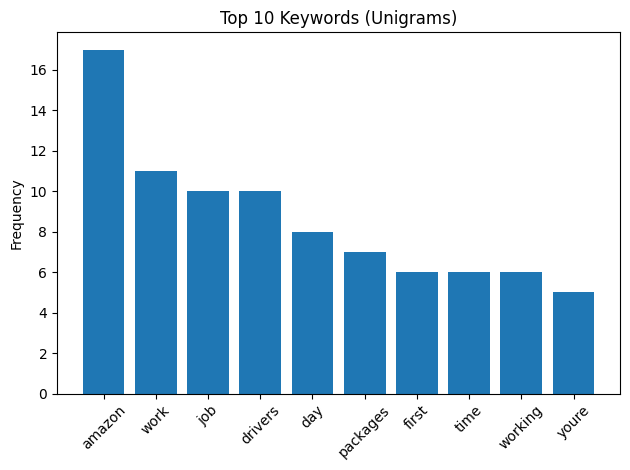

In [8]:
import matplotlib.pyplot as plt

most_common = word_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [9]:
stop_keywords = ['team','company', 'job', 'work']
filtered_words = [word for word in all_words if word not in stop_keywords]
filtered_counts = Counter(filtered_words)

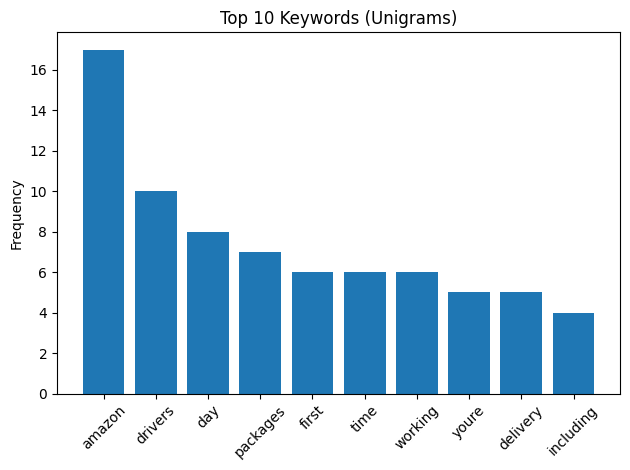

In [10]:
most_common = filtered_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [11]:
from nltk.util import ngrams

bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)


In [12]:
print(bigram_counts.most_common(3))

[(('working', 'amazon'), 4), (('youre', 'going'), 3), (('dont', 'need'), 3)]


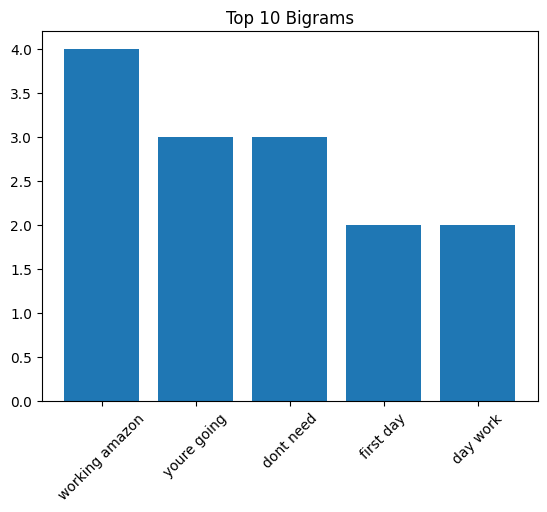

In [13]:
# For bigrams
common_bigrams = bigram_counts.most_common(5)
bg_labels = [' '.join(bg) for bg, count in common_bigrams]
bg_counts = [count for bg, count in common_bigrams]

plt.bar(bg_labels, bg_counts)
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.show()


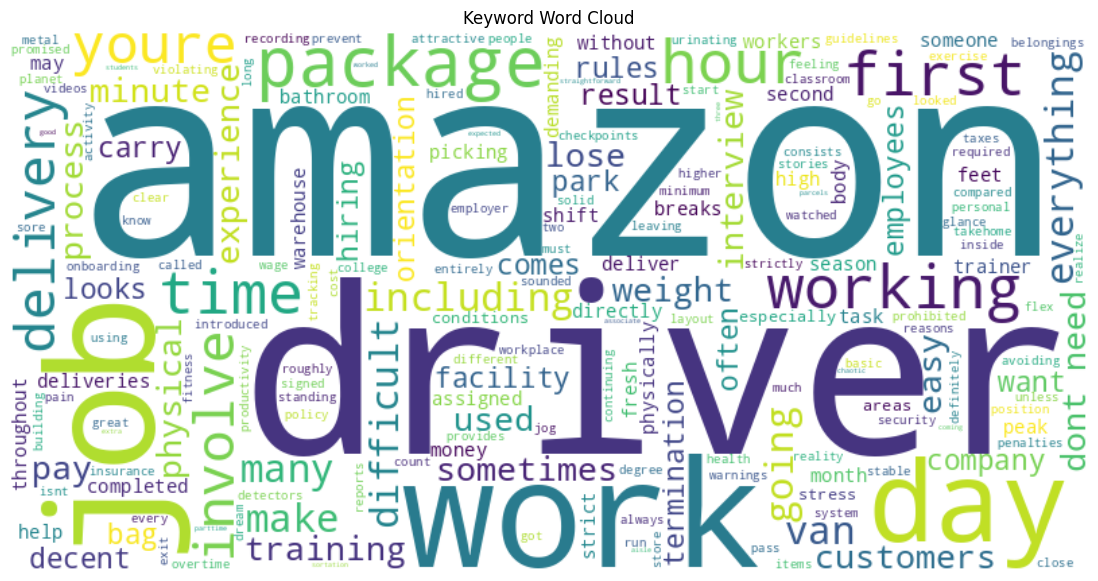

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud")
plt.show()